In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# data dir

data_dir = 'D:/thon/project/tourism/2022년/카드데이터'

# data load

card = pd.read_csv(data_dir + '/card_sports.csv') # load하는데 10초 소요
card = card.drop(['Unnamed: 0'], axis = 1)
card['ta_ym'] = pd.to_datetime(card['ta_ym'], format='%Y%m')

In [50]:
card['vlm'].quantile(0.999)

417421566.0000149

In [45]:
q3 = card['vlm'].quantile(0.75)
q1 = card['vlm'].quantile(0.25)
iqr = q3 - q1
print(q1 - 1.5 * iqr, q3 + 1.5 * iqr)
card.loc[card['vlm'] > q3 + 1.5 * iqr]

-3551428.875 6381432.125


,v1,v2,v3,gb3,gb2,sex_ccd,cln_age_r,ta_ym,daw_ccd_r,apv_ts_dl_tm_r,vlm,usec,cluster1
1,울산,울산,남구,스포츠활동,헬스,M,30,2022-03-01,WHITE,휴식,94882900,588,0
4,광주,광주,북구,스포츠활동,스포츠용품구매,F,60,2021-08-01,WHITE,활동,69405000,789,0
5,광주,광주,서구,스포츠활동,골프,M,40,2021-06-01,WHITE,휴식,25742900,648,1
6,대전,대전,서구,스포츠활동,골프,M,40,2021-12-01,RED,활동,22582800,367,1
7,부산,부산,중구,스포츠활동,스포츠용품구매,M,20,2021-06-01,RED,활동,13823500,216,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7560851,충북,충북,청주시,스포츠활동,골프,M,60,2018-12-01,WHITE,활동,55908953,1237,0
7560854,충북,충북,충주시,스포츠활동,스포츠용품구매,F,20,2018-12-01,WHITE,활동,69553984,583,0
7560855,경기,경기,화성시,스포츠활동,골프,F,50,2018-12-01,RED,활동,40990476,487,1
7560856,경기,경기,남양주시,스포츠활동,스포츠용품구매,M,50,2018-12-01,WHITE,활동,241262843,1544,0


In [28]:
# 취급액이 지나치게 큰 3개 행 삭제
card['vlm'].sort_values()

1064325               0
7128941               0
745059                0
5886295               0
747960                0
               ...     
592807       7790521000
5816281      7860814255
1975354     75379250310
1839721    766590978440
2429621    766682539931
Name: vlm, Length: 7560859, dtype: int64

In [30]:
card = card.drop([2429621, 1839721, 1975354])
card.shape

(7560856, 12)

In [31]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = card[['vlm', 'usec']]

sc = StandardScaler()
card_scaled = sc.fit_transform(df)
pd.DataFrame(card_scaled)

In [43]:
pd.DataFrame(card_scaled)

,0,1
0,-0.122965,0.127568
1,2.604061,1.704729
2,-0.179851,-0.080927
3,-0.054900,0.376416
4,1.850179,2.380655
...,...,...
7560851,1.854588,1.687915
7560852,1.009405,1.365084
7560853,6.935386,4.919582
7560854,-0.193069,-0.222165


In [32]:
# K-Means 클러스터링 (k = 3)
k = 3

model = KMeans(n_clusters = k, random_state = 11)
model.fit(card_scaled)
card['cluster_k3'] = model.fit_predict(card_scaled)

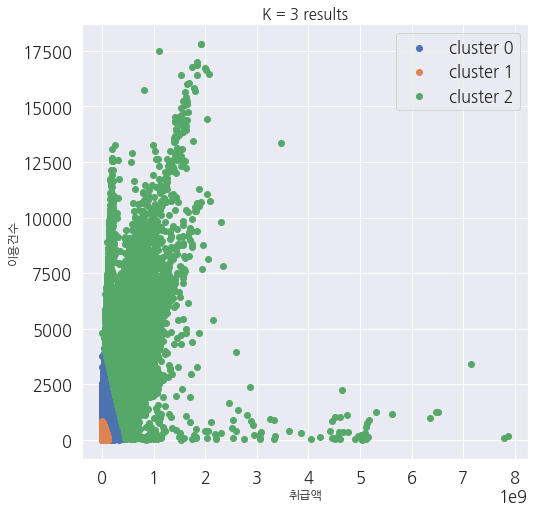

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale = 1.5)
plt.rc("font", family = "NanumGothic") # 한글깨짐 방지
plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(card.loc[card['cluster1'] == i, 'vlm'], card.loc[card['cluster1'] == i, 'usec'],
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('취급액', size = 12)
plt.ylabel('이용건수', size = 12)
plt.show()

In [36]:
card.groupby('cluster1').count()

,v1,v2,v3,gb3,gb2,sex_ccd,cln_age_r,ta_ym,daw_ccd_r,apv_ts_dl_tm_r,vlm,usec
cluster1,,,,,,,,,,,,
0,229602,229602,229602,229602,229602,229602,229602,229602,229602,229602,229602,229602
1,7259009,7306918,7306918,7306918,7306918,7306918,7306918,7306918,7306918,7306918,7306918,7306918
2,24336,24336,24336,24336,24336,24336,24336,24336,24336,24336,24336,24336


In [37]:
card.groupby('cluster1').mean()

,cln_age_r,vlm,usec
cluster1,,,
0,40.298821,8.649158e+07,1019.314975
1,38.457637,3.087772e+06,40.713371
2,42.149901,3.934589e+08,3344.677186


In [51]:
# K-Means 클러스터링 (k = 4)
k = 4

model = KMeans(n_clusters = k, random_state = 11)
model.fit(card_scaled)
card['cluster_k4'] = model.fit_predict(card_scaled)

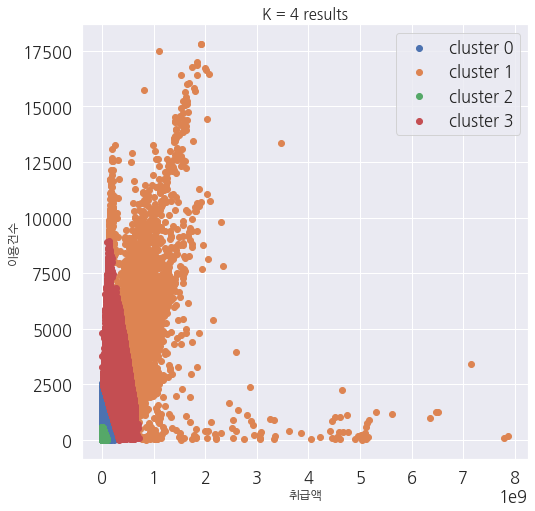

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale = 1.5)
plt.rc("font", family = "NanumGothic") # 한글깨짐 방지
plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(card.loc[card['cluster4'] == i, 'vlm'], card.loc[card['cluster4'] == i, 'usec'],
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('취급액', size = 12)
plt.ylabel('이용건수', size = 12)
plt.show()